## Name : Prachi Ranjan
## Contact No: +91 8106694870
## Mail ID : pra.rjn@gmail.com
## Oasis Infobyte Data Science Internship
## Github Link: https://github.com/PrachiRanjan3/OIBSIP
## Task 4 : Email Spam Detection with Machine Learning

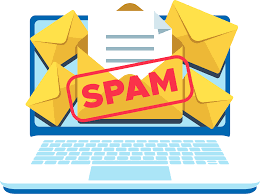
### We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam.

## Importing the necessary libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
import re
from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\prach\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
Email_data= pd.read_csv('spam.csv', encoding='ISO-8859-1')
Email_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
Email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
Email_data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
Email_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis =1,inplace =True)

In [6]:
Email_data=Email_data.rename(columns={'v1': 'class', 'v2': 'text'})

In [7]:
Email_data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
Email_data.shape

(5572, 2)

In [9]:
Email_data[Email_data.duplicated(keep=False)]

,class,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [10]:
Email_data.drop_duplicates(inplace =True)

In [11]:
Email_data.shape

(5169, 2)

In [12]:
Email_data['class'].unique()

array(['ham', 'spam'], dtype=object)

In [13]:
No_of_class =Email_data.groupby('class').agg({'class': 'count'}).rename(columns={'class':'count'}).reset_index()
No_of_class

,class,count
0,ham,4516
1,spam,653


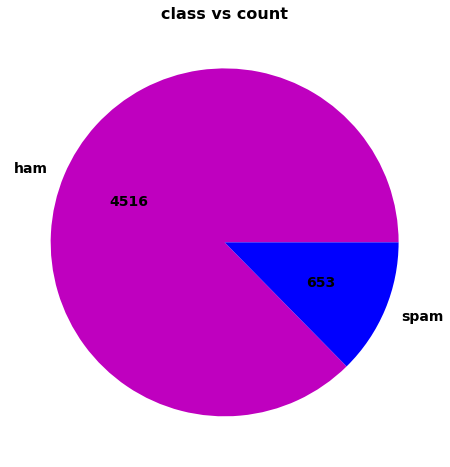

In [14]:
plt.figure(figsize=(8,8))
plt.pie(No_of_class['count'], autopct=lambda x: '{:.0f}'.format(x*No_of_class['count'].sum()/100), labels= No_of_class['class'], 
        textprops={'fontsize': 14, 'weight':'bold'}, colors=['m','b'])
plt.title('class vs count', fontsize=16, fontdict={'weight':'bold'})
plt.show()

### Encoding the 'class' Column

In [15]:
Email_data['class'] = Email_data['class'].map({'ham': 0, 'spam': 1})

In [16]:
Email_data.head()

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Countervectorizing x and y

In [17]:
cv= CountVectorizer()

In [18]:
x= cv.fit_transform(Email_data['text'])
y= Email_data['class']

## Preparing the data for training and testing of model

In [19]:
x_train, x_test,y_train, y_test= train_test_split(x,y, test_size= 0.2,random_state=0)

## Training the data using Multinomial Naive Bayes

In [20]:
model_1 = MultinomialNB().fit(x_train, y_train)

## Evaluating the performance using Multinomial Naive Bayes 

In [21]:
y_pred_1= model_1.predict(x_test)

In [22]:
confusion_Matrix_1 = confusion_matrix(y_test, y_pred_1)
print('confusion Matrix: ')
print(confusion_Matrix_1)

confusion Matrix: 
[[872  13]
 [ 10 139]]


In [23]:
Accuracy_1 = accuracy_score(y_test, y_pred_1)
print('Accuracy: ', Accuracy_1)

Accuracy:  0.9777562862669246


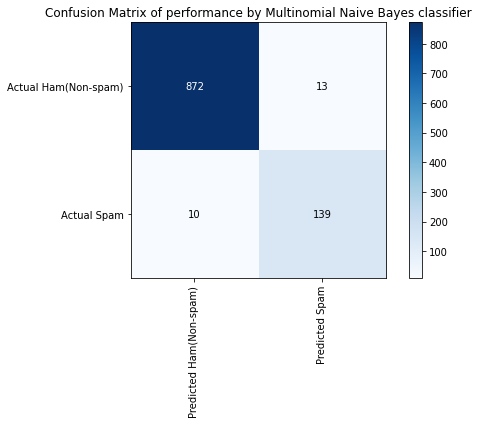

In [24]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_Matrix_1, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix of performance by Multinomial Naive Bayes classifier')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification (e.g., 0 for non-spam and 1 for spam)
plt.xticks(tick_marks, ['Predicted Ham(Non-spam)', 'Predicted Spam'], rotation=90)
plt.yticks(tick_marks, ['Actual Ham(Non-spam)', 'Actual Spam'])
plt.tight_layout()
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(confusion_Matrix_1[i, j], 'd'), ha="center", va="center", color="white" 
                 if confusion_Matrix_1[i, j] > confusion_Matrix_1.max() / 2. else "black")
plt.show()

## Training the data using Support Vector Machine

In [25]:
model_2 = SVC().fit(x_train, y_train)

## Evaluating the performance using Support Vector Machine

In [26]:
y_pred_2= model_2.predict(x_test)

In [27]:
confusion_Matrix_2 = confusion_matrix(y_test, y_pred_2)
print('confusion Matrix: ')
print(confusion_Matrix_2)

confusion Matrix: 
[[884   1]
 [ 23 126]]


In [28]:
Accuracy_2 = accuracy_score(y_test, y_pred_2)
print('Accuracy: ', Accuracy_2)

Accuracy:  0.97678916827853


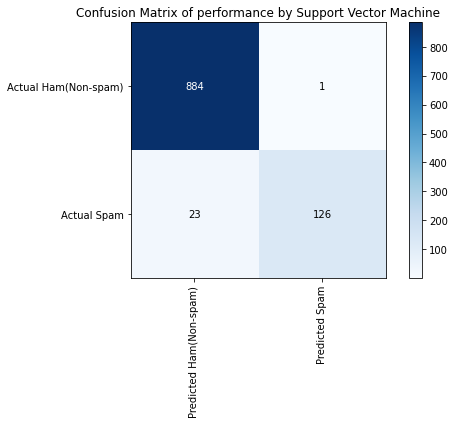

In [29]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_Matrix_2, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix of performance by Support Vector Machine')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification (e.g., 0 for non-spam and 1 for spam)
plt.xticks(tick_marks, ['Predicted Ham(Non-spam)', 'Predicted Spam'], rotation=90)
plt.yticks(tick_marks, ['Actual Ham(Non-spam)', 'Actual Spam'])
plt.tight_layout()
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(confusion_Matrix_2[i, j], 'd'), ha="center", va="center", color="white" 
                 if confusion_Matrix_2[i, j] > confusion_Matrix_2.max() / 2. else "black")
plt.show()

## Training the data using Logistic Regression

In [30]:
model_3 = LogisticRegression().fit(x_train, y_train)

## Evaluating the performance using Logistic Regression

In [31]:
y_pred_3= model_3.predict(x_test)

In [32]:
confusion_Matrix_3 = confusion_matrix(y_test, y_pred_3)
print('confusion Matrix: ')
print(confusion_Matrix_3)

confusion Matrix: 
[[884   1]
 [ 19 130]]


In [33]:
Accuracy_3 = accuracy_score(y_test, y_pred_3)
print('Accuracy: ', Accuracy_3)

Accuracy:  0.9806576402321083


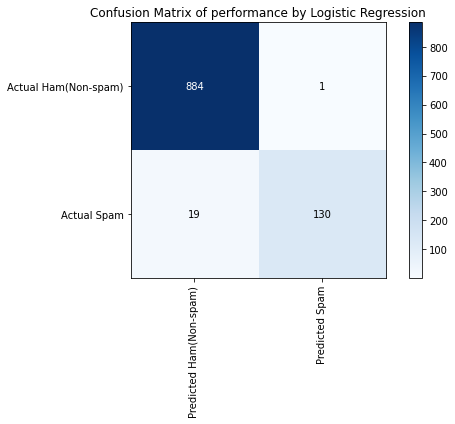

In [34]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_Matrix_3, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix of performance by Logistic Regression')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification (e.g., 0 for non-spam and 1 for spam)
plt.xticks(tick_marks, ['Predicted Ham(Non-spam)', 'Predicted Spam'], rotation=90)
plt.yticks(tick_marks, ['Actual Ham(Non-spam)', 'Actual Spam'])
plt.tight_layout()
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(confusion_Matrix_3[i, j], 'd'), ha="center", va="center", color="white" 
                 if confusion_Matrix_3[i, j] > confusion_Matrix_3.max() / 2. else "black")
plt.show()

## Training the data using Random Forest 

In [35]:
model_4 = RandomForestClassifier().fit(x_train, y_train)

## Evaluating the performance using Random Forest 

In [36]:
y_pred_4= model_4.predict(x_test)

In [37]:
confusion_Matrix_4 = confusion_matrix(y_test, y_pred_4)
print('confusion Matrix: ')
print(confusion_Matrix_4)

confusion Matrix: 
[[885   0]
 [ 29 120]]


In [38]:
Accuracy_4 = accuracy_score(y_test, y_pred_4)
print('Accuracy: ', Accuracy_4)

Accuracy:  0.971953578336557


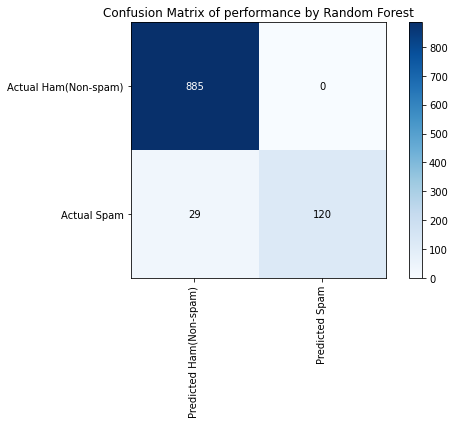

In [39]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_Matrix_4, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix of performance by Random Forest')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification (e.g., 0 for non-spam and 1 for spam)
plt.xticks(tick_marks, ['Predicted Ham(Non-spam)', 'Predicted Spam'], rotation=90)
plt.yticks(tick_marks, ['Actual Ham(Non-spam)', 'Actual Spam'])
plt.tight_layout()
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(confusion_Matrix_4[i, j], 'd'), ha="center", va="center", color="white" 
                 if confusion_Matrix_4[i, j] > confusion_Matrix_4.max() / 2. else "black")        
plt.show()

## Training the data using Decision Tree

In [40]:
model_5 = DecisionTreeClassifier().fit(x_train, y_train)

## Evaluating the performance using Decision Tree

In [41]:
y_pred_5= model_5.predict(x_test)

In [42]:
confusion_Matrix_5 = confusion_matrix(y_test, y_pred_5)
print('confusion Matrix: ')
print(confusion_Matrix_5)

confusion Matrix: 
[[875  10]
 [ 21 128]]


In [43]:
Accuracy_5 = accuracy_score(y_test, y_pred_5)
print('Accuracy: ', Accuracy_5)

Accuracy:  0.9700193423597679


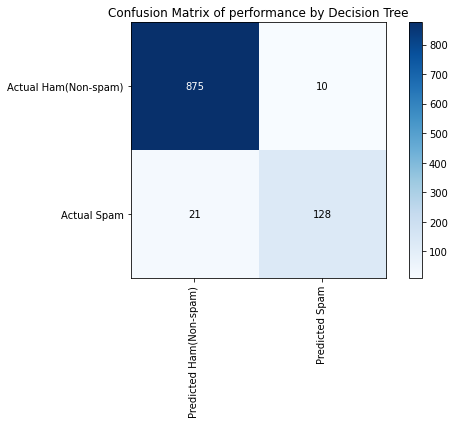

In [44]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_Matrix_5, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix of performance by Decision Tree')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification (e.g., 0 for non-spam and 1 for spam)
plt.xticks(tick_marks, ['Predicted Ham(Non-spam)', 'Predicted Spam'], rotation=90)
plt.yticks(tick_marks, ['Actual Ham(Non-spam)', 'Actual Spam'])
plt.tight_layout()
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(confusion_Matrix_5[i, j], 'd'), ha="center", va="center", color="white" 
                 if confusion_Matrix_5[i, j] > confusion_Matrix_5.max() / 2. else "black")
plt.show()

### Individual Accuracy scores of each model

In [53]:
print("1. Logistic Regression :     ", Accuracy_3)
print("2. MultiNominal Naive Bayes :", Accuracy_1)
print("3. Support Vector Machine :  ", Accuracy_2)
print("4. Random Forest  :          ", Accuracy_4)
print("5. Decision Tree  :          ", Accuracy_5)

1. Logistic Regression :      0.9806576402321083
2. MultiNominal Naive Bayes : 0.9777562862669246
3. Support Vector Machine :   0.97678916827853
4. Random Forest  :           0.971953578336557
5. Decision Tree  :           0.9700193423597679


In [46]:
## Saving the best Model

In [47]:
joblib.dump(model_3, 'Logistic Regression_model.joblib')

['Logistic Regression_model.joblib']

In [48]:
def model_eval():
    loaded_model = joblib.load('Logistic Regression_model.joblib')
 


    def classify_message(input_message):
       
        input_message = re.sub(r'[^a-zA-Z0-9\s]', '', input_message)  # Remove special characters
        input_message = input_message.lower()   # Convert to lowercase
        input_message = [input_message]  
        
        input_message_vectorized = cv.transform(input_message)
    
       
        prediction = loaded_model.predict(input_message_vectorized)
    
        return prediction[0]  
    # User input
    user_input = input("Enter a message: ")
    
    # Call the classify_message function to detect spam or non-spam
    result = classify_message(user_input)
    
    # Display the result to the user
    if result == 1:
        print("Spam detected.")
    else:
        print("The above entered message is a Non-spam (ham) message.")

In [49]:
model_eval()

Enter a message: click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL
Spam detected.


In [50]:
model_eval()

Enter a message: Hey Prachi, We hope you've been enjoying the Black Friday excitement! We wanted to remind you that our exclusive 50% discount on our Annual Plan will expire tomorrow night at 11:59 PM Pacific Time.
The above entered message is a Non-spam (ham) message.


In [51]:
model_eval()

Enter a message: Hi Prachi,     Shhhh. There’s a secret we want to share with you.   We know who is going to win the Cricket World Cup.      And the answer will leave you amazed ‘cause YOU’re going to be the winner! 🤩     Wondering how? 🤔     By taking part in the World’s Biggest Cricket Quiz Festival, you get a chance to bag rewards that are as exciting as Dhoni’s winning six from 2011:   Win cash rewards from a prize pool INR 4 Lakhs 💰                - The overall Grand Finale winner wins a whopping INR 1,00,000/-            -  Runner up bags INR 50,000/
Spam detected.


In [52]:
model_eval()

Enter a message: Permission slips or office work, paper or digital — filling out forms is simple with Acrobat Pro. Just upload your document and get it done. Get started
The above entered message is a Non-spam (ham) message.
